In [1]:
import pandas as pd
import requests

data = requests.get(
    'https://ravenclaw-services.herokuapp.com/CRUD/admin/lihat-data-pengajuan')
df = pd.DataFrame(data.json())
df.sample(4)

df['Date'] = df['due'].apply(lambda x:x['due_date'])
df['Close'] = df['bsu'].apply(lambda x:x['bsu_fix'])

In [2]:
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.tools as tls
from plotly.offline import iplot, init_notebook_mode
import plotly.figure_factory as ff


In [3]:
df

,order_id,username,name,divisi,manajer,kategori,aktivitas,status,due,bsu,mitra,metode_pengadaan,Date,Close
0,AO-1665998110,rudinur,Rudi Nur Sulistiyono,AO,Tri Widiartono,CAPEX,Pengadaan Cloud Service,ON PROCESS,"{'due_quarter': 'Q3', 'due_date': '2021-03-26'}","{'bsu_kategori': 'fix', 'bsu_fix': 236479995.7...",Google,Pembelian Langsung Terbatas,2021-03-26,2.364800e+08
1,AO-1665998112,rudinur,Rudi Nur Sulistiyono,AO,Tri Widiartono,OPEX,Pengadaan Bootcamp Web Development,REQUESTED,"{'due_quarter': 'Q3', 'due_date': '2021-03-29'}","{'bsu_kategori': 'fix', 'bsu_fix': 235240005.4...",iBox,Penunjukkan Langsung,2021-03-29,2.352400e+08
2,AO-1665998113,rudinur,Rudi Nur Sulistiyono,AO,Yuyus Nurkamal,OPEX,Pengadaan Cloud Service,COMPLETED,"{'due_quarter': 'Q3', 'due_date': '2021-03-30'}","{'bsu_kategori': 'fix', 'bsu_fix': 231850006.1...",Alibaba,Penunjukkan Langsung,2021-03-30,2.318500e+08
3,AO-1665998115,rudinur,Rudi Nur Sulistiyono,AO,Edi Priyatno,CAPEX,Pengadaan Bootcamp Web Development,REQUESTED,"{'due_quarter': 'Q3', 'due_date': '2021-03-31'}","{'bsu_kategori': 'fix', 'bsu_fix': 235770004.2...",Amazon,Pembelian Langsung Terbatas,2021-03-31,2.357700e+08
4,AO-1665998117,rudinur,Rudi Nur Sulistiyono,AO,Edi Priyatno,CAPEX,Support Maintanance,REQUESTED,"{'due_quarter': 'Q3', 'due_date': '2021-04-01'}","{'bsu_kategori': 'fix', 'bsu_fix': 242350006.1...",PT Telkom Indonesia,Lelang Terbuka,2021-04-01,2.423500e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,ITG-1665999935,errykusumayadi,Erry Kusumayadi,ITSG,Syukuri,OPEX,Support Maintanance,REQUESTED,"{'due_quarter': 'Q1', 'due_date': '2022-01-03'}","{'bsu_kategori': 'fix', 'bsu_fix': 334750000.0}",Erajaya,Lelang Terbuka,2022-01-03,3.347500e+08
196,ITG-1665999937,errykusumayadi,Erry Kusumayadi,ITSG,Syukuri,OPEX,Pengadaan Bootcamp Web Development,REJECTED,"{'due_quarter': 'Q1', 'due_date': '2022-01-04'}","{'bsu_kategori': 'fix', 'bsu_fix': 329010009.7...",Amazon,Lelang Terbuka,2022-01-04,3.290100e+08
197,ITG-1665999939,errykusumayadi,Erry Kusumayadi,ITSG,Fikri,OPEX,Pengadaan Cloud Service,REJECTED,"{'due_quarter': 'Q1', 'due_date': '2022-01-05'}","{'bsu_kategori': 'fix', 'bsu_fix': 316380004.8...",Swamedia Informatika,Lelang Terbuka,2022-01-05,3.163800e+08
198,ITG-1666054248,errykusumayadi,Erry Kusumayadi,ITSG,Hamdani,CAPEX,Support Maintanance,REJECTED,"{'due_quarter': 'Q1', 'due_date': '2022-01-06'}","{'bsu_kategori': 'fix', 'bsu_fix': 313880004.8...",PT Pln Indonesia,Pembelian Langsung Terbatas,2022-01-06,3.138800e+08


In [35]:
df['bulan'] = df['Date'].apply(lambda x: "-".join(x.split('-')[:2]))

In [39]:
pengajuan_bulan = df.groupby(['bulan']).count()['Close'].reset_index()
pengajuan_bulan

,bulan,Close
0,2021-03,4
1,2021-04,21
2,2021-05,20
3,2021-06,22
4,2021-07,21
5,2021-08,22
6,2021-09,21
7,2021-10,21
8,2021-11,21
9,2021-12,22


In [40]:
pengajuan_bulan_mean = df.groupby(['bulan']).mean()['Close'].reset_index()
pengajuan_bulan_mean


,bulan,Close
0,2021-03,2.348350e+08
1,2021-04,2.555800e+08
2,2021-05,2.473955e+08
3,2021-06,2.590182e+08
4,2021-07,2.815024e+08
5,2021-08,2.943141e+08
6,2021-09,2.968743e+08
7,2021-10,3.035424e+08
8,2021-11,3.358709e+08
9,2021-12,3.328077e+08


In [41]:
pengajuan_bulan_sum = df.groupby(['bulan']).sum()['Close'].reset_index()
pengajuan_bulan_sum

,bulan,Close
0,2021-03,9.393400e+08
1,2021-04,5.367180e+09
2,2021-05,4.947910e+09
3,2021-06,5.698400e+09
4,2021-07,5.911550e+09
5,2021-08,6.474910e+09
6,2021-09,6.234360e+09
7,2021-10,6.374390e+09
8,2021-11,7.053290e+09
9,2021-12,7.321770e+09


##### Wordcloud

In [4]:
filtered_words = df['aktivitas'].to_list()

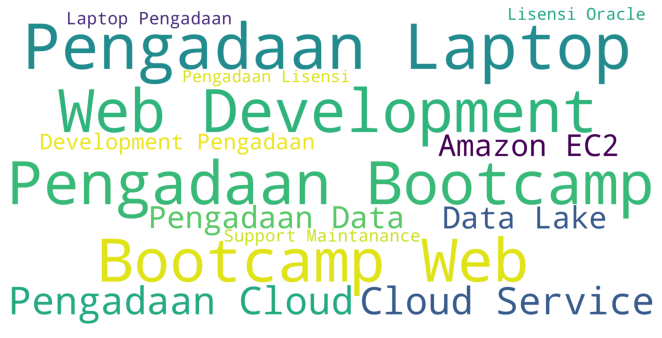

In [5]:
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


# lower max_font_size, change the maximum number of word and lighten the background:

wordcloud = WordCloud(width=4000, height=2000,
                      background_color='white',
                      min_font_size=10).generate(" ".join(filtered_words))

plt.figure(figsize=(9, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('assets/foo.png')


##### Forecast

In [6]:
import plotly.graph_objects as go
data_forecast = pd.read_csv('static_forecast.csv')


fig_for = go.Figure()

fig_for.add_trace(
    go.Scatter(
        x=data_forecast['dates_train'],
        y=data_forecast['train_predictions'],
        name='Predictions'
    ))

fig_for.add_trace(
    go.Scatter(
        x=data_forecast['dates_train'],
        y=data_forecast['y_train'],
        name='Target Data'
    ))

fig_for.update_layout(title='Forecasting')


fig_for.show()


In [7]:
penyerapan_anggaran = df.groupby(['divisi']).sum()[
    'Close'].reset_index()
penyerapan_anggaran.sort_values(by='Close')


,divisi,Close
0,AO,5.547270e+09
3,ITSG,1.196565e+10
1,DEVOPS,1.990607e+10
2,ITAIS,2.051217e+10


In [8]:
status_count = df.groupby(['status']).count()[
    'Close'].reset_index()
status_count

,status,Close
0,COMPLETED,56
1,ON PROCESS,44
2,REJECTED,46
3,REQUESTED,54


In [9]:
divisi_agg = df.groupby(['divisi']).count()[
    'order_id'].reset_index()
divisi_agg


,divisi,order_id
0,AO,22
1,DEVOPS,75
2,ITAIS,67
3,ITSG,36


In [10]:
fig_bar_gab = px.histogram(df, x='divisi', color='manajer', barmode="group",
                           title=f"Distribusi Kategori per Divisi")
fig_bar_gab.update_layout(width=700, height=800, bargap=0.001)
fig_bar_gab.show()


In [11]:
fig_bar_gab = px.histogram(df, x='kategori', color='divisi', barmode="group",
                           title=f"Distribusi Kategori per Divisi")
fig_bar_gab.update_layout(width=700, height=500, bargap=0.2)
fig_bar_gab.show()


In [12]:
# Use `hole` to create a donut-like pie chart
fig_divisi_top = go.Figure(data=[go.Pie(labels=divisi_agg['divisi'],
                                    values=divisi_agg['order_id'], hole=.5)])
fig_divisi_top.update_layout(width=600, title='#Count Pengajuan Per Divisi')
fig_divisi_top.show()


In [13]:
divisi_agg_sum = df.groupby(['divisi']).sum()[
    'Close'].reset_index()



In [14]:
# Use `hole` to create a donut-like pie chart
fig_divisi_sum = go.Figure(data=[go.Pie(labels=divisi_agg_sum['divisi'],
                                        values=divisi_agg_sum['Close'], hole=.5)])
fig_divisi_sum.update_layout(width=600, title='Jumlah Anggaran Per Divisi')
fig_divisi_sum.show()


In [15]:
metode_pengadaan = df.groupby(['metode_pengadaan']).count()['order_id'].reset_index()


In [16]:
metode_pengadaan


,metode_pengadaan,order_id
0,Lelang Terbuka,47
1,Pembelian Langsung,55
2,Pembelian Langsung Terbatas,54
3,Penunjukkan Langsung,44


In [17]:
from turtle import width
import plotly.graph_objects as go

# Use `hole` to create a donut-like pie chart
fig_metode = go.Figure(data=[go.Pie(labels=metode_pengadaan['metode_pengadaan'],
                values=metode_pengadaan['order_id'], hole=.5)])
fig_metode.update_layout(width=600, title='Persentase Metode Pengadaan')
fig_metode.show()


In [18]:
top_mitra = df.groupby(['mitra']).count()['order_id'].reset_index()
top_mitra = top_mitra.sort_values(by='order_id')[:10]

In [19]:


mitra_hor_bar = px.bar(x=top_mitra['order_id'],
                     y=top_mitra['mitra'], orientation='h',
                     labels={'x': 'Jumlah Pengadaan', 'y': 'Nama Mitra'})

mitra_hor_bar.update_layout(title_text=f"<b>Top Mitra</b>",
                          width=700, height=500, bargap=0.5)
mitra_hor_bar.show()


In [20]:
bottom_topic = df.groupby(['aktivitas']).count()['order_id'].reset_index()
bottom_topic = bottom_topic.sort_values(by='order_id')[:]
bottom_topic


,aktivitas,order_id
5,Pengadaan Lisensi Oracle,24
6,Support Maintanance,26
0,Amazon EC2,27
2,Pengadaan Cloud Service,28
3,Pengadaan Data Lake,28
1,Pengadaan Bootcamp Web Development,32
4,Pengadaan Laptop,35


In [21]:


topic = px.bar(x=top_mitra['order_id'],
                     y=top_mitra['mitra'], orientation='h',
                     labels={'x': 'Jumlah Pengadaan', 'y': 'Nama Mitra'})

topic.update_layout(title_text=f"Top Mitra",
                          width=700, height=500, bargap=0.5)
topic.show()


In [22]:
# df['kategori'] = df['kategori'].apply(lambda x: x.upper())

In [23]:
# df

In [24]:

status_count

,status,Close
0,COMPLETED,56
1,ON PROCESS,44
2,REJECTED,46
3,REQUESTED,54


In [25]:
penyerapan_anggaran


,divisi,Close
0,AO,5.547270e+09
1,DEVOPS,1.990607e+10
2,ITAIS,2.051217e+10
3,ITSG,1.196565e+10


In [26]:
penyerapan_anggaran['Close'][0]

5547269989.013672

In [27]:
image_path = 'assets/foo.png'


In [28]:
import dash_html_components as html
import dash_core_components as dcc
import dash
import plotly.graph_objects as go  # or plotly.express as px
fig = go.Figure()  # or any Plotly Express function e.g. px.bar(...)
# fig.add_trace( ... )
# fig.update_layout( ... )


app = dash.Dash()

app.layout = html.Div(children=[
    html.Div(
        children=[html.H1("Status Pengajuan")],
    ),
    html.Div(
        children=[
            html.Div(
            children=[html.H3(f"{status_count['Close'][0]}"), html.P(
                f"{status_count['status'][0]}")],
            style={
                   'padding': '5px', 'border-radius': '5px', 'margin': '5px', 'width': '400px', 'background-color': '#5cb85c', 'color': '#fff','font-family':'Verdana','font-size':'30px'}
        ),
            html.Div(
            children=[html.H3(f"{status_count['Close'][1]}"), html.P(
                f"{status_count['status'][1]}")],
                style={
                       'padding': '5px', 'border-radius': '5px', 'margin': '5px', 'width': '400px', 'background-color': '#0275d8', 'color': '#fff', 'font-family': 'Verdana', 'font-size': '30px'}
        ),
        html.Div(
            children=[html.H3(f"{status_count['Close'][2]}"), html.P(
                f"{status_count['status'][2]}")],
            style={
                   'padding': '5px', 'border-radius': '5px', 'margin': '5px', 'width': '400px', 'background-color': '#df4759', 'color': '#fff', 'font-family': 'Verdana', 'font-size': '30px'}
        ),
            html.Div(
            children=[html.H3(f"{status_count['Close'][3]}"), html.P(
                f"{status_count['status'][3]}")],
            style={
                   'padding': '5px', 'border-radius': '5px', 'margin': '5px', 'width': '400px', 'background-color': '#f0ad4e', 'color': '#fff', 'font-family': 'Verdana', 'font-size': '30px'}
        ) ],
        style = {'display': 'flex' , 'align-items': 'center', 'justify-content': 'center','font-family':'Verdana'}
    ),
    html.Div(
        children=[html.H1("Penyerapan Anggaran")],
    ),
    html.Div(
        children=[
            html.Div(children=[
                html.P(penyerapan_anggaran['divisi'][0]),
                html.P('Rp {:,.2f}'.format(penyerapan_anggaran['Close'][0])),
            ], style={'display': 'flex', 'justify-content': 'space-between', 'color': '#212124','font-size':'25px'}),
            html.Div(children=[
                html.P(penyerapan_anggaran['divisi'][1]),
                html.P('Rp {:,.2f}'.format(penyerapan_anggaran['Close'][1])),
            ], style={'display': 'flex', 'justify-content': 'space-between', 'color': '#212124', 'font-size': '25px'}),
                        html.Div(children=[
                html.P(penyerapan_anggaran['divisi'][2]),
                html.P('Rp {:,.2f}'.format(penyerapan_anggaran['Close'][2])),
            ], style={'display': 'flex', 'justify-content': 'space-between', 'color': '#212124','font-size':'25px'}),
            html.Div(children=[
                html.P(penyerapan_anggaran['divisi'][3]),
                html.P('Rp {:,.2f}'.format(penyerapan_anggaran['Close'][3])),
            ], style={'display': 'flex', 'justify-content': 'space-between', 'color': '#212124', 'font-size': '25px'})
            
        ],
        style={'width': 'max', 'border': '2px solid #A9A9A9',
               'padding': '10px', 'border-radius': '5px', 'margin': '10px'}
    ),
    html.Div(
        children=[html.H1("Predictive Analytics")],
    ),
    html.Div(children=[
        html.Div(children=[
            html.P('WordCloud',style={'margin-left':'10px'}),
            html.Img(src=image_path)
        ], style={'width': '800px', 'height':'500px', 'border': '2px solid #A9A9A9', 'padding': '10px', 'border-radius': '5px', 'margin': '10px'}
        ),
        html.Div(children=[
            dcc.Graph(figure=fig_divisi_top)
        ], style={'width': '800px', 'border': '2px solid #A9A9A9', 'padding': '10px', 'border-radius': '5px', 'margin': '10px'}
        ),
    ], style={'display': 'flex', 'justify-content': 'center', 'margin': '10px'}),
    html.Div(children=[
        html.Div(children=[
            dcc.Graph(figure=fig_for)
        ], style={'width': 'max', 'border': '2px solid #A9A9A9', 'padding': '10px', 'border-radius': '5px', 'margin': '10px'}
        ),
    ]),

    html.Div(
        children=[html.H1("Charts")],
    ),
    html.Div(children=[
        html.Div(children=[
            dcc.Graph(figure=fig_bar_gab)
        ], style={'width': '800px', 'border': '2px solid #A9A9A9', 'padding': '10px', 'border-radius': '5px','margin': '10px'}
        ),
        html.Div(children=[
            dcc.Graph(figure=fig_metode)
        ], style={'width': '800px', 'border': '2px solid #A9A9A9', 'padding': '10px', 'border-radius': '5px','margin': '10px'}
        ),
    ], style={'display': 'flex', 'justify-content': 'center', 'margin': '10px'}),
    html.Div(children=[
        html.Div(children=[
            dcc.Graph(figure=fig_divisi_top)
        ], style={'width': '800px', 'border': '2px solid #A9A9A9', 'padding': '10px', 'border-radius': '5px','margin': '10px'}
        ),
        html.Div(children=[
            dcc.Graph(figure=fig_divisi_sum)
        ], style={'width': '800px', 'border': '2px solid #A9A9A9', 'padding': '10px', 'border-radius': '5px','margin': '10px'}
        ),
    ], style={'display': 'flex', 'justify-content': 'center', 'margin': '10px'}),
    html.Div(children=[
        html.Div(children=[
            dcc.Graph(figure=mitra_hor_bar)
        ], style={'width': '800px', 'border': '2px solid #A9A9A9', 'padding': '10px', 'border-radius': '5px', 'margin': '10px'}
        ),
        html.Div(children=[
            # dcc.Graph(figure=fig_divisi_sum)
        ], style={'width': '800px', 'border': '2px solid #A9A9A9', 'padding': '10px', 'border-radius': '5px', 'margin': '10px'}
        ),
    ], style={'display': 'flex', 'justify-content': 'center', 'margin': '10px'}),
],
style={'max-width': '1400px', 'margin': '0 auto', 'overflow': 'auto', 'padding': '0 40px', 'font-family':'Verdana'})

# Turn off reloader if inside Jupyter
app.run_server()


Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__'
 * Debug mode: off


C:\Users\hafid\AppData\Local\Temp/ipykernel_18100/1608878454.py:1: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`

C:\Users\hafid\AppData\Local\Temp/ipykernel_18100/1608878454.py:2: UserWarning:


The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`

 * Running on http://127.0.0.1:8050
Press CTRL+C to quit
127.0.0.1 - - [18/Oct/2022 15:56:43] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [18/Oct/2022 15:56:43] "GET /assets/stylesheet.css?m=1666068939.819808 HTTP/1.1" 304 -
127.0.0.1 - - [18/Oct/2022 15:56:44] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [18/Oct/2022 15:56:44] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [18/Oct/2022 15:56:44] "GET /_favicon.ico?v=2.6.2 HTTP/1.1" 200 -
127.0.0.1 - - [18/Oct/2022 15:56:44] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 304 -
127.0.0.1 - - [18/Oct/